In [1]:
#2018/ASP/17
#Question number 02

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.tree import DecisionTreeClassifier as dtc
import sklearn.tree as tree

In [2]:
data=pd.read_csv("salaries.csv")

In [3]:
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
X=data[['company','job','degree']].values

In [5]:
from sklearn import preprocessing as prp


In [6]:
company = prp.LabelEncoder()
company.fit(['google', 'abc pharma', 'facebook'])
X[:, 0] = company.transform(X[:, 0])

In [7]:
job=prp.LabelEncoder()
job.fit(['sales executive','business manager','computer programmer'])
X[:,1]=job.transform(X[:,1])

In [8]:
degree=prp.LabelEncoder()
degree.fit(['bachelors','masters'])
X[:,2]=degree.transform(X[:,2])

In [9]:
Y=data['salary_more_then_100k']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [11]:
data=dtc(criterion="entropy",max_depth=3)

In [12]:
data.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
predictTree=data.predict(X_test)
print(predictTree[0:5])
print(Y_test[0:5])

[1 1 1 1 1]
1     0
6     0
8     0
9     1
13    1
Name: salary_more_then_100k, dtype: int64


In [14]:
from sklearn import metrics
print("Decision Tree Accuracy:",metrics.accuracy_score(Y_test,predictTree))

Decision Tree Accuracy: 0.4


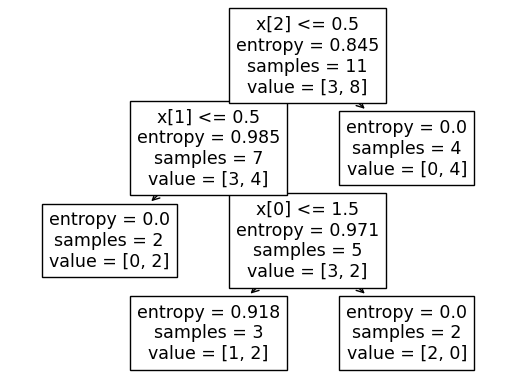

In [15]:
import matplotlib.pyplot as plt
tree.plot_tree(data)
plt.show()

In [16]:
input_values = {'company': 'google', 'job': 'business manager', 'degree': 'bachelors'}
input_encoded = [company.transform([input_values['company']])[0],
                 job.transform([input_values['job']])[0],
                 degree.transform([input_values['degree']])[0]]

prediction =data.predict([input_encoded])

# Display the prediction
print(f"The predicted salary will{'' if prediction else ' not'} be more than 100k.")

The predicted salary will be more than 100k.
